# Машинное обучение, DS-поток
## Задание ML.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 70 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 60 баллов.

In [105]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error as MSE
from tqdm import tqdm

---
### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $\mathsf{D}\varepsilon_i$.

*Решение прикрепил отдельным файлом 1.pdf*

---
### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [107]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на train и test, выделив на test 25% данных.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь **один случайный лес**. В этом вам поможет аттрибут `_estimators` у обученной модели. Последовательно вызывайте predict у каждого дерева и усредняйте полученные результаты.

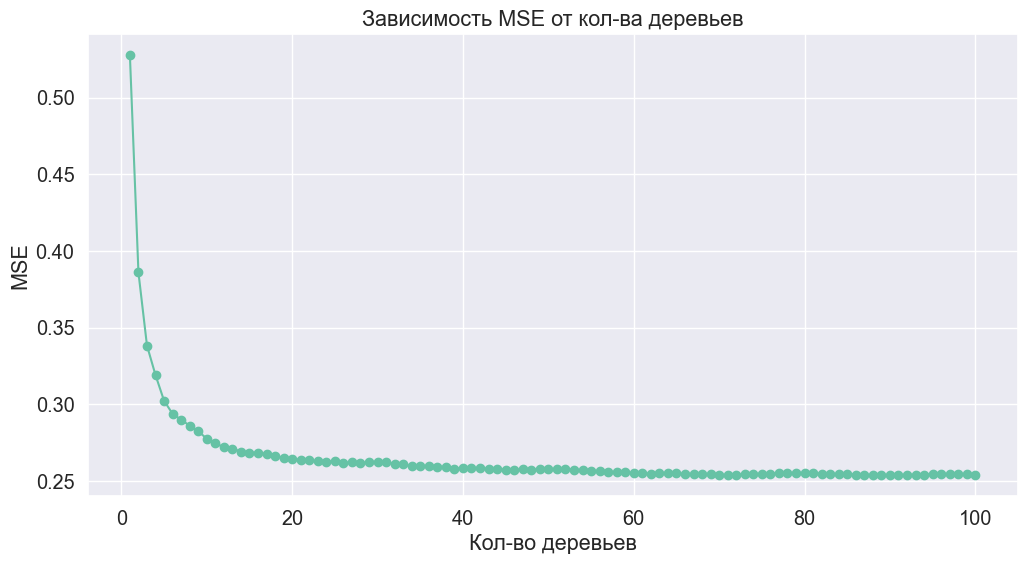

In [109]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # обучаем один лес (без tqdm)
model.fit(X_train, y_train)
estimators_preds = np.array([tree.predict(X_test) for tree in model.estimators_])  # предикты отдельных деревьев
forests_preds = np.cumsum(estimators_preds, axis=0) / np.repeat(np.arange(1,101)[:, np.newaxis], len(estimators_preds[0]), axis=1)  # cum mean
forest_mses = [MSE(y_test, pred) for pred in forests_preds]  # ошибки лесов всех размеров

plt.figure(figsize=(12,6))
plt.plot(np.arange(1,101), forest_mses, marker='o')
plt.title('Зависимость MSE от кол-ва деревьев')
plt.xlabel('Кол-во деревьев')
plt.ylabel('MSE')
plt.show()

100%|██████████| 23/23 [02:45<00:00,  7.21s/it]


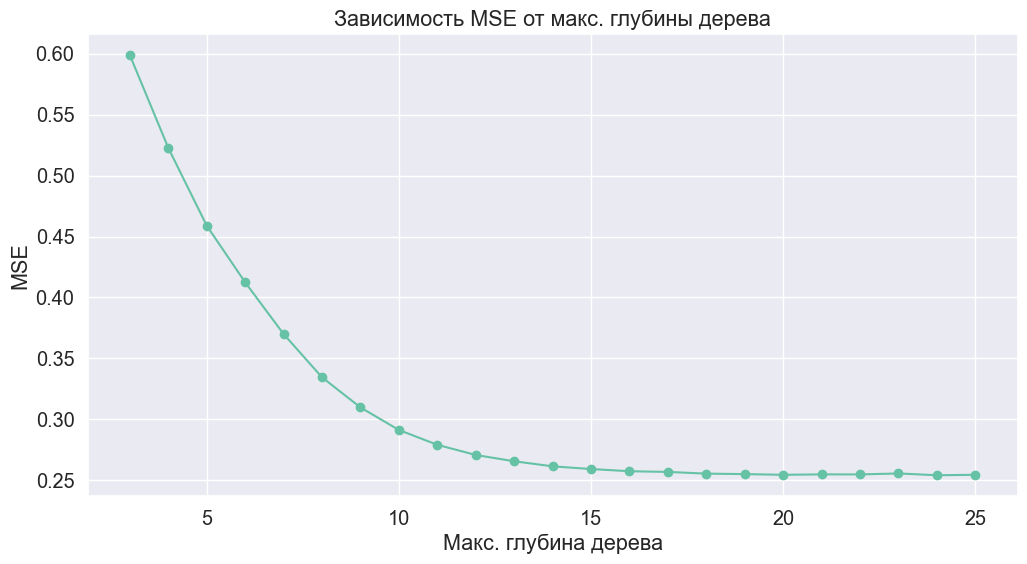

In [110]:
forest_mses = []
for depth in tqdm(np.arange(3,26)):
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    forest_mses.append(MSE(y_test, model.predict(X_test)))

plt.figure(figsize=(12,6))
plt.plot(np.arange(3,26), forest_mses, marker='o')
plt.title('Зависимость MSE от макс. глубины дерева')
plt.xlabel('Макс. глубина дерева')
plt.ylabel('MSE')
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

***Ответ:***  
*1) глобально: чем больше деревьев и чем они глубже, тем ниже ошибка MSE. Это объясняется с помощью bias-variance разложения, выведенного на лекции. Чем глубже дерево, тем меньше его bias и тем больше его variance (иными словами, глубокие деревья склонны переобучаться). У леса получается унаследовать малый bias от индивидуальных деревьев, но при этом снизить variance за счет усреднения предиктов. Причем пока деревья коррелируют слабо, с ростом числа деревьев variance падает*  
*2) при больших значениях параметров: ошибка выходит на плато. К сожалению, прирост от бэггинга не бесконечен, ведь в какой-то момент деревья начинают сильно коррелировать. Как выводилось на лекции, в этот момент прирост по качеству останавливается*  
*3) в отличие от одного глубокого дерева, случайный лес практически неозможно переобучить. В какой-то момент деревья начнут сильно коррелировать и ошибка просто выйдет на плато*  

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [111]:
for _ in range(3):
    model = RandomForestRegressor()  # тут уже не фиксирую random_state
    model.fit(X_train, y_train)
    print(round(MSE(y_test, model.predict(X_test)), 3))

0.254
0.255
0.252


***Ответ:***  
*1) каждое дерево в составе леса обучается на случайной подматрице из матрицы признаков (т.е. на случайных признаках и на случайных примерах из выборки)*  
*2) на каждом сплите признаки случайно переставляются (чему даже уделен отдельный абзац в документации)*  
*Всё это сделано, чтобы максимально снизить корреляцию между деревьями*  

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [112]:
gridsearch = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid = {
        'max_depth': np.arange(3,26),
        'n_estimators': np.arange(1,101,3)},
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = 'neg_mean_squared_error'
)
gridsearch.fit(X_train, y_train);

Выведите найденные оптимальные параметры.

In [113]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')

Лучшие параметры:
max_depth: 23
n_estimators: 94


Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [114]:
max_depth, n_estimators = gridsearch.best_params_['max_depth'], gridsearch.best_params_['n_estimators']

Оценим качество предсказаний обученного решающего леса.

In [115]:
model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
model.fit(X_train, y_train)
print(round(MSE(y_test, model.predict(X_test)), 3))

0.256


*Ошибка действительно довольно низкая*

Исследуйте зависимость метрики MSE от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [116]:
test_mses, train_mses = [], []
for max_features in tqdm(np.arange(1,9)):
    model = RandomForestRegressor(max_features=max_features, max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    test_mses.append(MSE(y_test, model.predict(X_test)))
    train_mses.append(MSE(y_train, model.predict(X_train)))

100%|██████████| 8/8 [00:47<00:00,  5.91s/it]


Постройте график зависимости метрики MSE на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

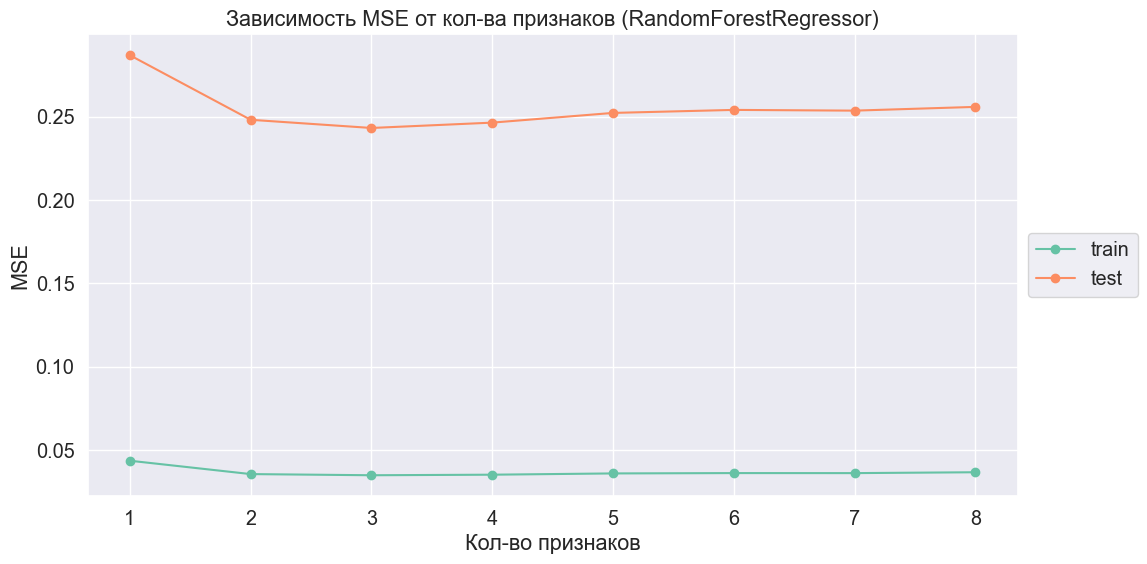

In [117]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,9), train_mses, label='train', marker='o')
plt.plot(np.arange(1,9), test_mses, label='test', marker='o')
plt.title('Зависимость MSE от кол-ва признаков (RandomForestRegressor)')
plt.xlabel('Кол-во признаков')
plt.ylabel('MSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев, инными словами их скоррелированность, от величины `n_features`?

***Ответ:** по графику видно, что оптимальное число признаков небольшое, около 2-4. Это вызвано тем, что при обучении на разных признаках деревья станоятся менее скоррелировванными (более разнообразными). Это помогает снизить variance ансамбля*

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики MSE на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

100%|██████████| 8/8 [00:47<00:00,  5.93s/it]


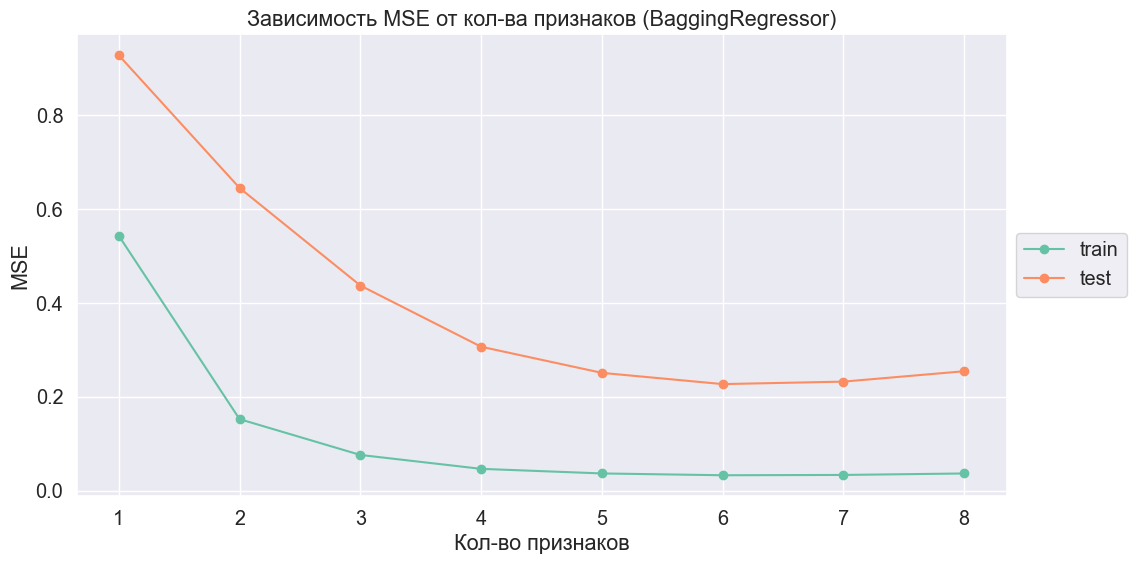

In [118]:
test_mses, train_mses = [], []
for max_features in tqdm(np.arange(1,9)):
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=max_depth),
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    test_mses.append(MSE(y_test, model.predict(X_test)))
    train_mses.append(MSE(y_train, model.predict(X_train)))

plt.figure(figsize=(12,6))
plt.plot(np.arange(1,9), train_mses, label='train', marker='o')
plt.plot(np.arange(1,9), test_mses, label='test', marker='o')
plt.title('Зависимость MSE от кол-ва признаков (BaggingRegressor)')
plt.xlabel('Кол-во признаков')
plt.ylabel('MSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

***Вывод:** теперь ошибка резко возросла при малом числе признаков, а оптимум сместился к числу признаков порядка 6-7. Когда мы ограничили число признаков для всего ансамбля сразу, мы подтолкнули индивидуальные деревья к более выраженной корреляции (заставив их обучаться на похожих наборах признаков). Но чтобы минимизировать variance ансамбля, важно разнообразить деревья, т.е. добиться, чтобы деревья обучались не столько на малом числе признаков, сколько на разных наборах\срезах признаков. Поэтому подход из этого подпункта неудачен*

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

*1) ограничивается число признаков для всего ансамбля, легко возникает скоррелированность деревьев*  
*2) ограничивается число признаков для каждого дерева: можно добиться высокого разнообразия деревьев и снижения variance у ансамбля. Более удачный подход*

---
### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

In [178]:
bag_dt = RandomForestRegressor(n_estimators=100, random_state=42)
bag_dt.fit(X_train, y_train)
pred_dt = np.array([dt.predict(X_test) for dt in bag_dt.estimators_])  # базовые модели
pred_bag_dt = bag_dt.predict(X_test)  # бэггинг

bag_ridge = BaggingRegressor(estimator=Ridge(), n_estimators=100, random_state=42)
bag_ridge.fit(X_train, y_train)
pred_ridge = np.array([ridge.predict(X_test) for ridge in bag_ridge.estimators_])  # базовые модели
pred_bag_ridge = bag_ridge.predict(X_test)  # бэггинг

print('Разброс:')
pd.DataFrame({
    'Деревья': [np.var(pred_dt, axis=1).mean(), np.var(pred_bag_dt)], 
    'Ridge': [np.var(pred_ridge, axis=1).mean(), np.var(pred_bag_ridge)]
}, index=['Баз. модели','Бэггинг'])

Разброс:


,Деревья,Ridge
Баз. модели,1.330524,0.826844
Бэггинг,1.022800,0.824678


*Бэггинг позволил заметно снизить variance у деревьев, но практически не повлиял на ridge-регрессию. Это логично: усреднение нескольких линейных моделей - это тоже некоторая линейная модель (без каких-либо видимых преимуществ)*

In [175]:
corr_dt, corr_ridge = np.corrcoef(pred_dt), np.corrcoef(pred_ridge)  # корреляции предсказаний базовых моделей
for corr, label in zip([corr_dt,corr_ridge], ['деревьев','ridge-регрессий']):
    avg_corr = np.mean(corr[np.where(~np.eye(corr.shape[0], dtype=bool))])  # ясно, что на диагонали стоят 1, которые завысят среднюю силу корреляции
    print(f'Средний уровень корреляции у {label}: {round(avg_corr, 3)}')

Средний уровень корреляции у деревьев: 0.766
Средний уровень корреляции у ridge-регрессий: 0.998


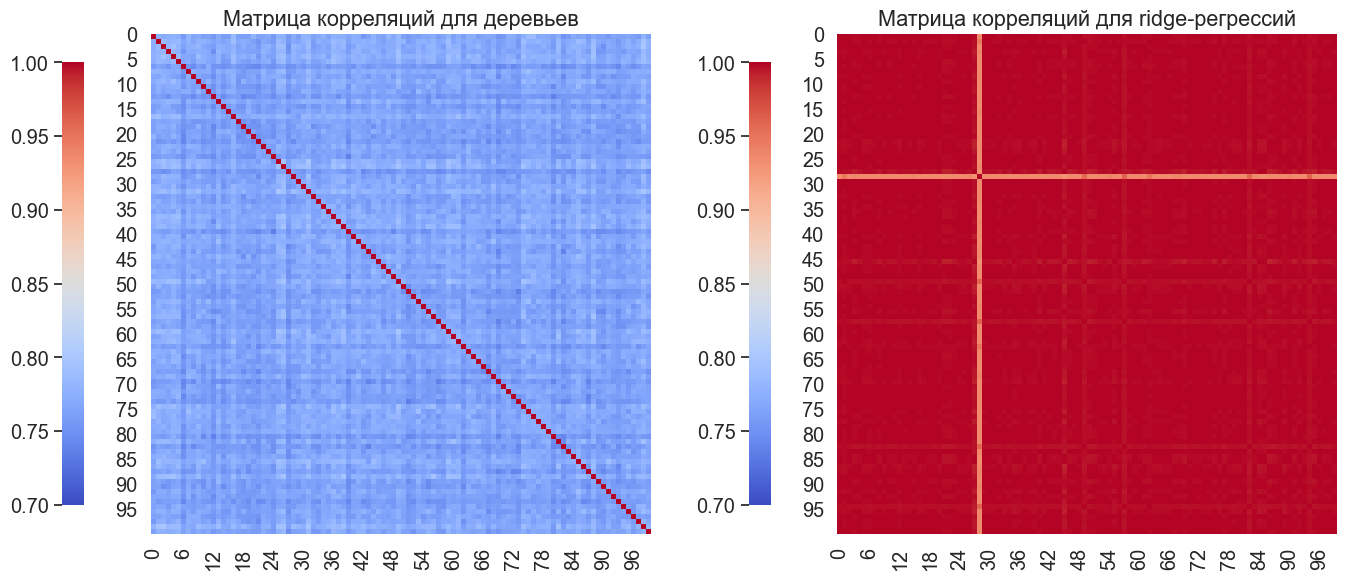

In [176]:
plt.figure(figsize=(14, 6))
for i, (corr, title) in enumerate(zip([corr_dt,corr_ridge], ['деревьев','ridge-регрессий'])):
    plt.subplot(1, 2, i+1)
    sns.heatmap(corr, cmap='coolwarm', square=True, cbar_kws={'shrink': .8, 'location':'left'}, annot=False, vmin=0.7, vmax=1)
    plt.title(f'Матрица корреляций для {title}')
plt.tight_layout()
plt.show()

*Деревья коррелируют средне, а ridge-регрессии - очень сильно (средняя сила корреляции 0.766 vs 0.998). Это подчеркиваает неэффектиность бэггинга для линейных моделей*

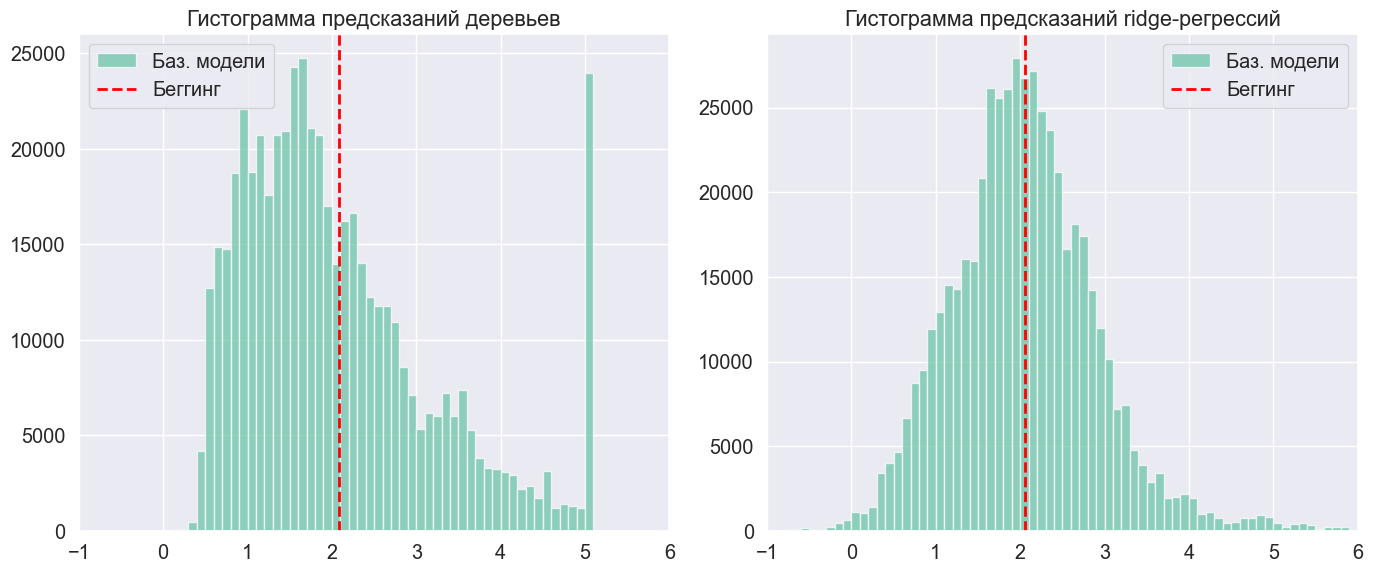

In [177]:
plt.figure(figsize=(14, 6))
for i, (pred, pred_bag, title) in enumerate(zip([pred_dt,pred_ridge], [pred_bag_dt,pred_bag_ridge], ['деревьев','ridge-регрессий'])):
    plt.subplot(1, 2, i+1)
    plt.hist(pred.flatten(), bins=np.arange(-1,6,0.1), alpha=0.7, label='Баз. модели')
    plt.axvline(pred_bag.mean(), color='red', linestyle='dashed', linewidth=2, label='Беггинг')
    plt.title(f'Гистограмма предсказаний {title}')
    plt.legend()
    plt.xlim((-1,6))
plt.tight_layout()
plt.show()

*Гистограмма предсказаний ridge-регрессий напоминает колокол нормального распределения. В целом, кажется, что предсказания ridge-регрессий ближе друг к другу, чем предсказания дереьев. Это иллюстрирует более сильную корреляцию ridge-регрессий между собой (альтернативно: большее разнообразие среди моделей-деревьев)*

***Вывод:** в рамках задачи удалось сравнить, как бэггинг работает с разными видами моделей (деревьями и ridge-регрессиями). Стало понятно, почему типичный пример бэггинга - ансамбль деревьев (случайный лес), ведь именно с деревьями преимущеста бэггинга проявляются сильнее всего*

---
### Задача 4

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: **Grid Search** и **Random Search**. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* **Grid Search** &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* **Random Search** &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [308]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

*У функции много локальных минимумов, которые к тому же периодичны. Кроме того, глобальный минимум (в нуле) легко проскочить*  
*Догадываясь, какой дальше будет вопрос, вычислим f(x) в узлах сетки с разным размером шага*  

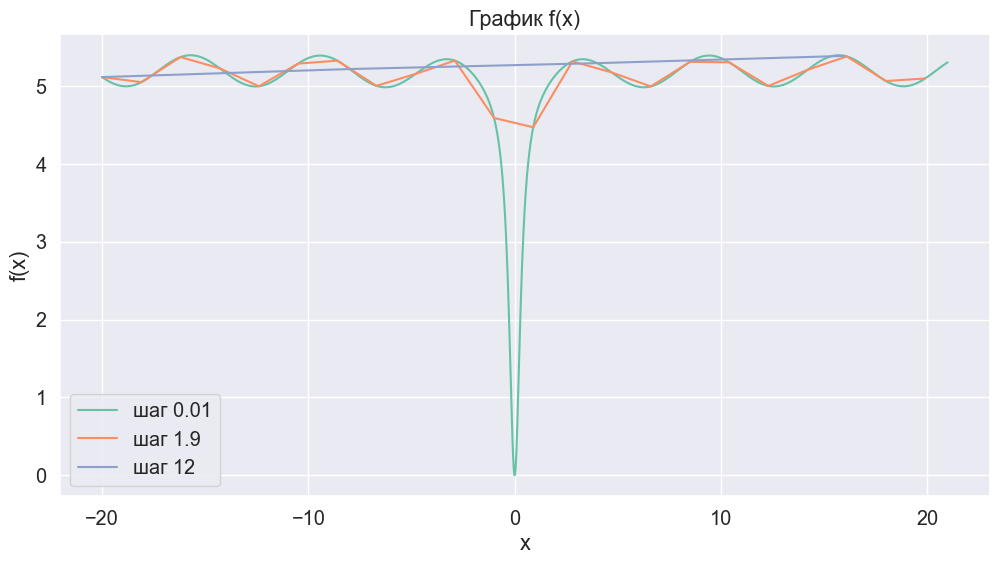

In [309]:
plt.figure(figsize=(12,6))
for step in [0.01,1.9, 12]:  # размер шага сетки
    xs = np.arange(-20,21,step)
    plt.plot(xs, [f(x) for x in xs], label=f'шаг {step}')
plt.title('График f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

***Ответ:** на графике выше наглядно видно, что если неудачно подобрать шаг или начальное положение сетки, то легко проскочить глобальный минимум функции (а иногда - и остальные локальные минимумы). Однако, взять шаг слишком маленьким нельзя, т.к. это резко повысит вычислительную сложность перебора*

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [310]:
grid_size = np.arange(2, 1000)  # рассматриваемые размеры сеток
n_experiments = 100  # количество экспериментов

In [311]:
grid_min_f_trace = []  # массив для минимумов по сетке для текущего эксперимента
for _ in tqdm(range(n_experiments)):
    x_0 = np.random.uniform(-0.5, 0.5) # случайное смещение сетки на [-0.5, 0.5]
    grid_f_min = []  # массив минимумов для текущего размера сетки
    for n in grid_size:  # цикл по размеру сетки
        grid = np.linspace(-10, 10, n) + x_0  # сетка на [-10, 10] со смещением x_0 размера n
        f_min = np.min(f(grid))  # найденный по сетке  минимум функции f
        grid_f_min.append(f_min)  # сохраним минимум для сетки размера n
    grid_min_f_trace.append(grid_f_min)  # сохраним минимумы текущего эксперимента
grid_min_f_trace = np.array(grid_min_f_trace)

100%|██████████| 100/100 [00:03<00:00, 31.96it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

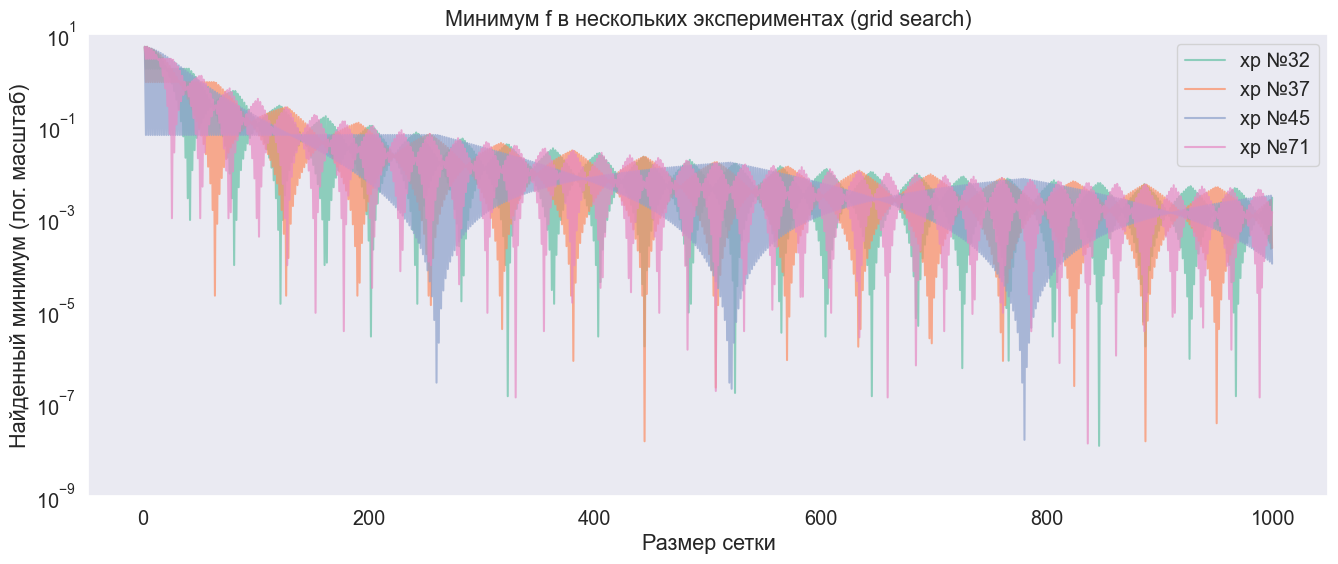

In [312]:
plt.figure(figsize=(16,6))
for i in sorted(np.random.randint(grid_min_f_trace.shape[0], size=4)):  # несколько рандомных экспериментов
    plt.plot(grid_size, grid_min_f_trace[i], alpha=0.7, label=f'xp №{i}')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Минимум f в нескольких экспериментах (grid search)')
plt.xlabel('Размер сетки')
plt.ylabel('Найденный минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

*1) чем чаще сетка, тем точнее получается найти минимум функции*  
*2) даже при малом смещении сетки значение функции может очень заметно поменяться (о чем говорят частые колебания, похожие на заливку, и точечные всплески на графике)*  
*Значит, стратегия перебора по сетке крайне чуствительна к начальным параметрам сетки: шагу и сдвигу* 

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [313]:
random_size = np.arange(2, 1000)  # рассматриваемое количество случайных точек

In [314]:
random_min_f_trace = []  # массив для минимумов для текущего эксперимента
for _ in tqdm(range(n_experiments)):
    x_0 = np.random.uniform(-0.5, 0.5) # случайное смещение сетки на [-0.5, 0.5]
    random_min_f = []  # массив для минимумов для текущего количества точек
    points = np.random.uniform(-10, 10, random_size[-1]) + x_0  # сгенерируем случайные на [-10, 10] точки сразу
    for n in random_size:  # цикл по количеству точек
        grid = points[:n]
        f_min = np.min(f(grid))  # найденный по первым n случайным точкам со смещением x_0 минимум функции 
        random_min_f.append(f_min)
    random_min_f_trace.append(random_min_f)
random_min_f_trace = np.array(random_min_f_trace)

100%|██████████| 100/100 [00:01<00:00, 56.72it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

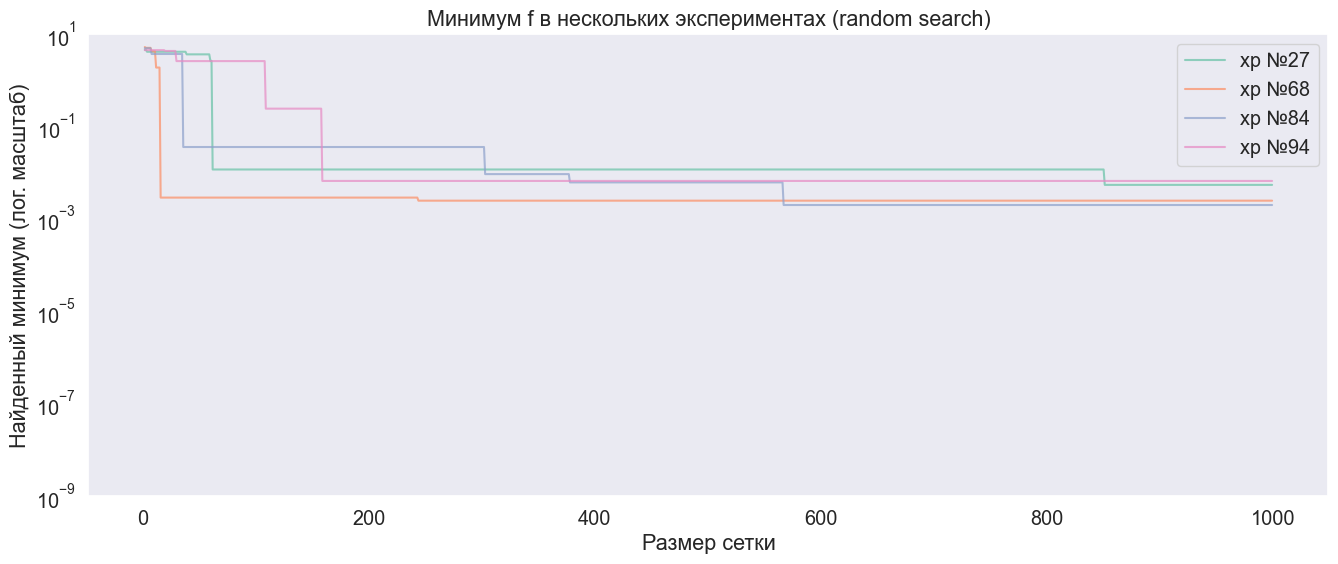

In [317]:
plt.figure(figsize=(16,6))
for i in sorted(np.random.randint(random_min_f_trace.shape[0], size=4)):  # несколько рандомных экспериментов
    plt.plot(random_size, random_min_f_trace[i], alpha=0.7, label=f'xp №{i}')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Минимум f в нескольких экспериментах (random search)')
plt.xlabel('Размер сетки')
plt.ylabel('Найденный минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

*1) снова чем чаще сетка, тем точнее получается найти минимум функции*  
*2) но теперь на графике нет частых колебаний и всплесков*  
*3) при этом, к сожалению, не удалось найти такой же низкий минимум, как в поиске по сетке (на одном из всплесков)*  
*Значит, стратегия random search показывает заметно большую устойчивость, но возможно - в ущерб вероятности найти самый низкий минимум на одном из всплесков* 

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

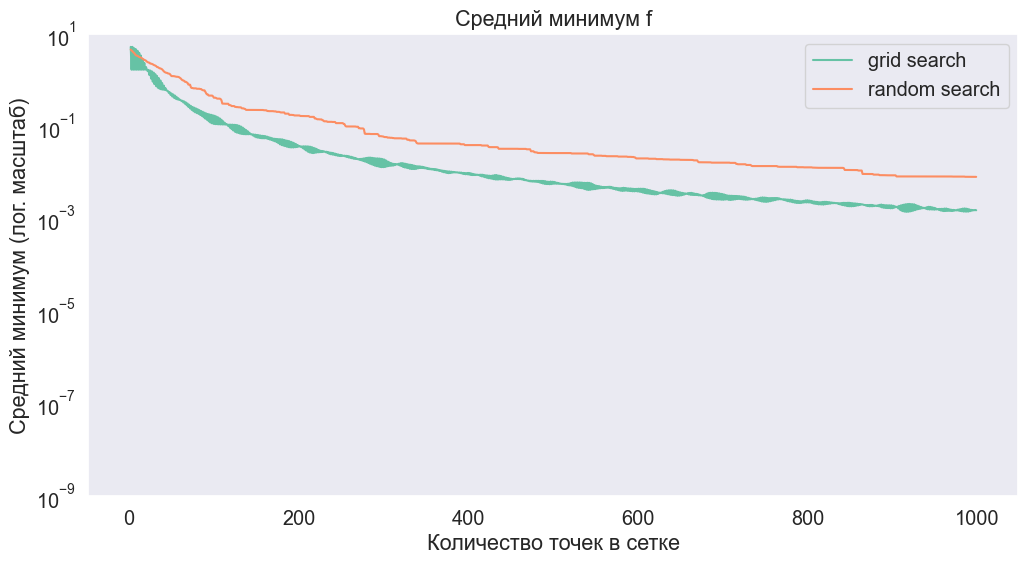

In [318]:
grid_avg_min, random_avg_min = np.mean(grid_min_f_trace, axis=0), np.mean(random_min_f_trace, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(grid_size, grid_avg_min, label='grid search')
plt.plot(random_size, random_avg_min, label='random search')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Средний минимум f')
plt.xlabel('Количество точек в сетке')
plt.ylabel('Средний минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

*Поиск по сетке в среднем работает чуть лучше (находит минимум поменьше). Это ожидаемый результат для одномерного перебора*  

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [319]:
def f(x, y):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

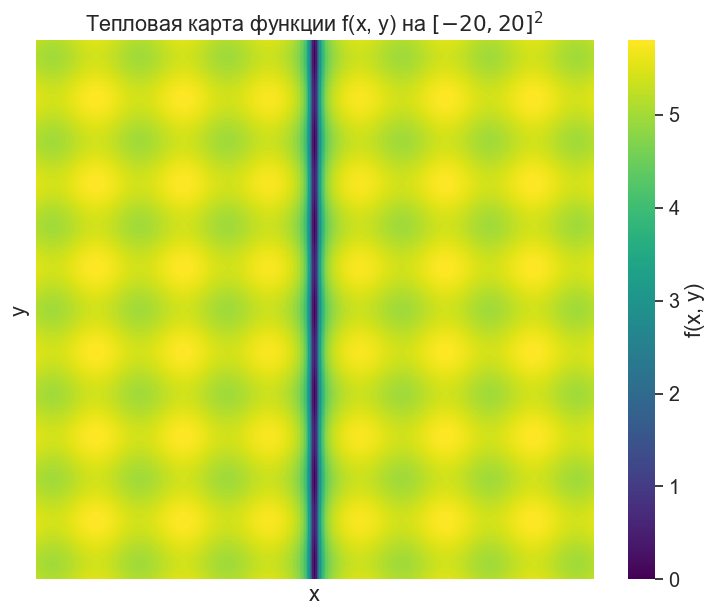

In [320]:
X, Y = np.meshgrid(np.linspace(-20, 20, 401), np.linspace(-20, 20, 401))
Z = pd.DataFrame(f(X, Y), index=np.linspace(-20, 20, 401), columns=np.linspace(-20, 20, 401))

plt.figure(figsize=(9, 7))
sns.heatmap(Z, cmap='viridis', cbar_kws={'label': 'f(x, y)'}, xticklabels=False, yticklabels=False)
plt.title('Тепловая карта функции f(x, y) на $[-20, 20]^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

100%|██████████| 100/100 [00:05<00:00, 16.87it/s]


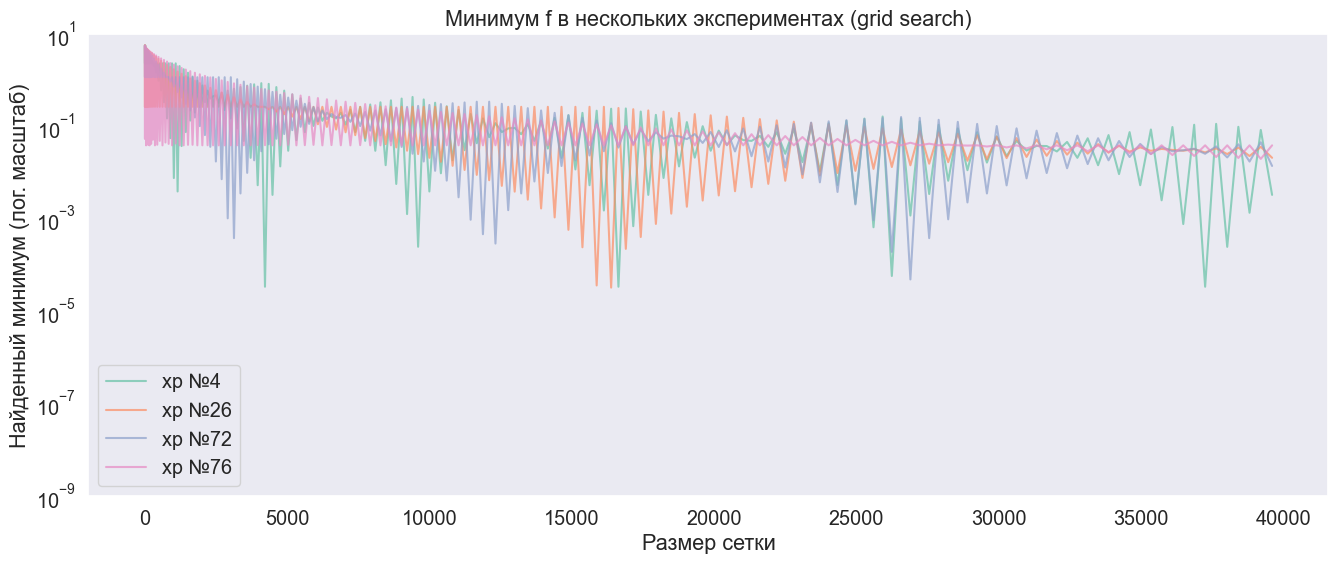

In [321]:
grid_size = np.arange(2, 200)
n_experiments = 100

grid_min_f_trace = [] 
for _ in tqdm(range(n_experiments)):
    x_0, y_0 = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)  
    grid_f_min = []  
    for n in grid_size: 
        grid_x, grid_y = np.meshgrid(np.linspace(-10, 10, n) + x_0, np.linspace(-10, 10, n) + y_0)
        f_min = np.min(f(grid_x, grid_y))
        grid_f_min.append(f_min)
    grid_min_f_trace.append(grid_f_min) 
grid_min_f_trace = np.array(grid_min_f_trace)

plt.figure(figsize=(16,6))
for i in sorted(np.random.randint(grid_min_f_trace.shape[0], size=4)): 
    plt.plot(grid_size**2, grid_min_f_trace[i], alpha=0.7, label=f'xp №{i}')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Минимум f в нескольких экспериментах (grid search)')
plt.xlabel('Размер сетки')
plt.ylabel('Найденный минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

100%|██████████| 100/100 [00:06<00:00, 14.62it/s]


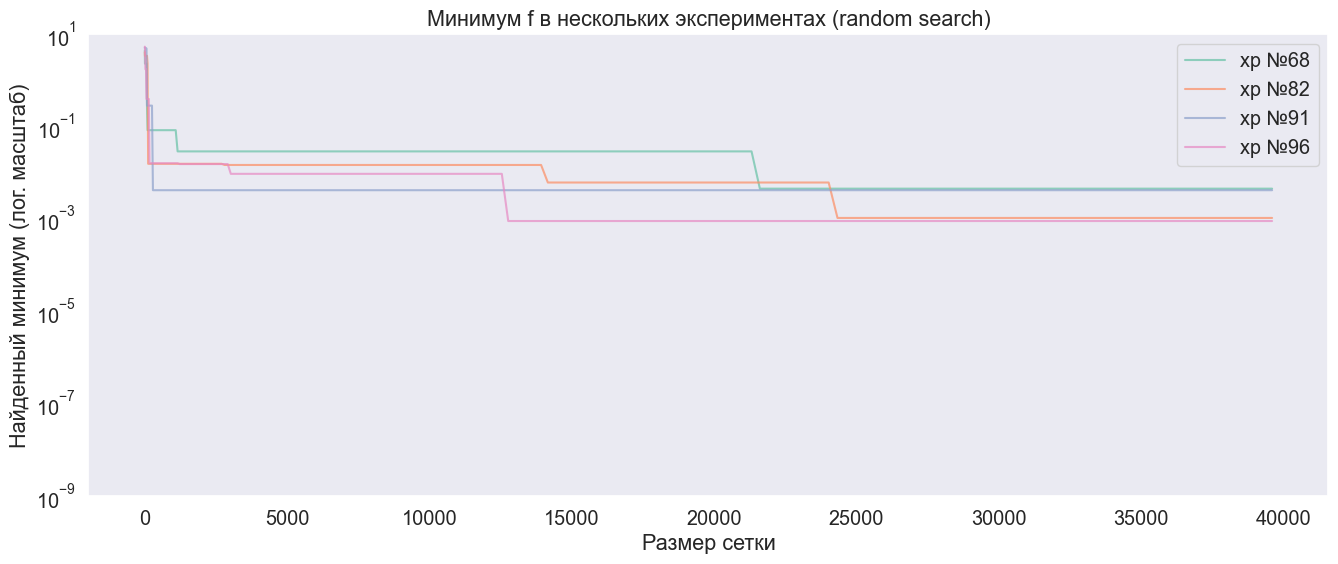

In [322]:
random_size = grid_size**2  # квадраты

random_min_f_trace = []
for _ in tqdm(range(n_experiments)):
    x_0, y_0 = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)
    random_min_f = []
    points = np.random.uniform(-10, 10, (random_size[-1],2)) + np.array([x_0, y_0])
    for n in random_size:
        grid_x, grid_y = points[:n, 0], points[:n, 1]
        f_min = np.min(f(grid_x, grid_y))
        random_min_f.append(f_min)
    random_min_f_trace.append(random_min_f)
random_min_f_trace = np.array(random_min_f_trace)

plt.figure(figsize=(16,6))
for i in sorted(np.random.randint(random_min_f_trace.shape[0], size=4)):  # несколько рандомных экспериментов
    plt.plot(random_size, random_min_f_trace[i], alpha=0.7, label=f'xp №{i}')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Минимум f в нескольких экспериментах (random search)')
plt.xlabel('Размер сетки')
plt.ylabel('Найденный минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

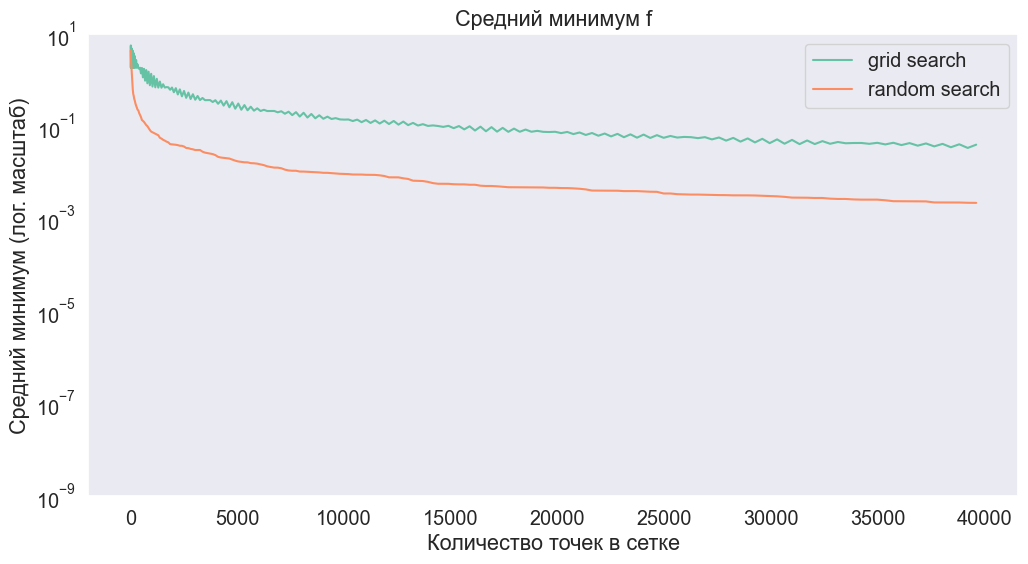

In [323]:
grid_avg_min, random_avg_min = np.mean(grid_min_f_trace, axis=0), np.mean(random_min_f_trace, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(grid_size**2, grid_avg_min, label='grid search')
plt.plot(random_size, random_avg_min, label='random search')
plt.yscale('log')
plt.ylim(1e-9, 10)
plt.title('Средний минимум f')
plt.xlabel('Количество точек в сетке')
plt.ylabel('Средний минимум (лог. масштаб)')
plt.grid()
plt.legend()
plt.show()

***Вывод:** в двумерной задаче уже random search работает заметно лучше*  
  
*В рамках задачи удалось сравнить random search и grid search. Оказалось, что в одномерной задаче по ряду причин лучше grid search, а в многомерной - random search*  